In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
catalyst_features = pd.read_excel('features.xlsx')
catalyst_features.replace([np.inf, -np.inf], np.nan, inplace=True)
catalyst_properties = pd.read_excel('properties.xlsx')
catalyst_properties.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X = np.array(catalyst_features)
y = np.array(catalyst_properties)

In [6]:
def generate_net(X_train, y_train):
    model = Sequential([Input(shape=(X_train.shape[1],))])

    model.add(Dense(30, activation='relu'))

    # Hidden layer
    model.add(Dense(20, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(10, activation='relu'))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='linear'))
    return model

def generate_net_less_complex(X_train, y_train):
    model = Sequential([Input(shape=(X_train.shape[1],))])

    model.add(Dense(25, activation='relu'))

    # Hidden layer
    model.add(Dense(15, activation='relu'))
    model.add(Dense(10, activation='relu'))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='linear'))
    return model

### writing the code to plot the learning curves for NN models

In [7]:
# Set up list to collect results
def run_learning_curve(X,y,model_net_function,metric):
    results_train_mse = []
    results_val_mse = []
    results_test_mse = []

    # Construct training sizes (values closer at lower end)
    train_sizes = [60,70,80,90,100,110,120,130,140,X.shape[0]]

    # Loop through training sizes
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X[:train_size,:], y[:train_size,:], test_size=0.2, random_state=22)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print('Train size: ', train_size, '\n')
        print('Starting the model training...\n')
        model = model_net_function(X_train_scaled, y_train)
        model.compile(optimizer='adam',
                  loss=metric,
                  metrics=[metric])
        history = model.fit(X_train_scaled, y_train, 
                            validation_split=0.2, 
                            epochs=150, 
                            batch_size=16, 
                            verbose=0)
        y_pred_all = model.predict(X_test_scaled)
        residual = np.array(y_test)-np.array(y_pred_all)
        if metric =='mse':
            mse_test = np.sum(np.mean(residual**2,axis=0))
        elif metric == 'mae':
            mse_test = np.sum(np.mean(residual,axis=0))
        results_train_mse.append(history.history[metric][-1])
        results_val_mse.append(history.history[f'val_{metric}'][-1])
        results_test_mse.append(mse_test)
        print('\nTraining completed.\n')
        print('----------------------------------------')
    return results_train_mse, results_val_mse, results_test_mse

In [12]:
results_train_mse, results_val_mse, results_test_mse = run_learning_curve(X,y,generate_net, metric='mse')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/st

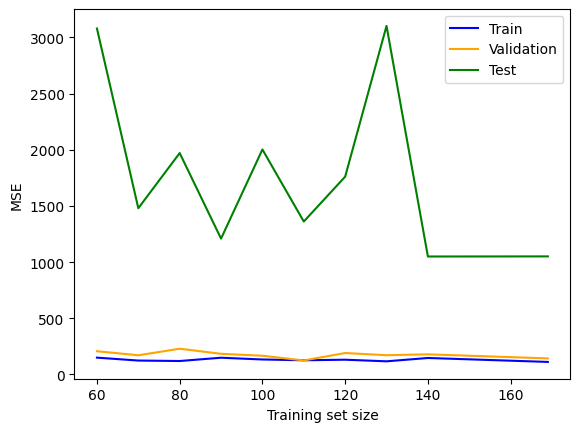

In [15]:
train_sizes = [60,70,80,90,100,110,120,130,140,X.shape[0]]
fig = plt.figure()
plt.plot(train_sizes, results_train_mse, color='b', label='Train')
plt.plot(train_sizes, results_val_mse, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mse, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.savefig('error_plots/Learning_Curve_NN_mse.png')
plt.show()
fig.clear()

### Performing learning curve analysis with mae loss function

In [17]:
results_train_mae, results_val_mae, results_test_mae = run_learning_curve(X,y,generate_net, metric='mae')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step



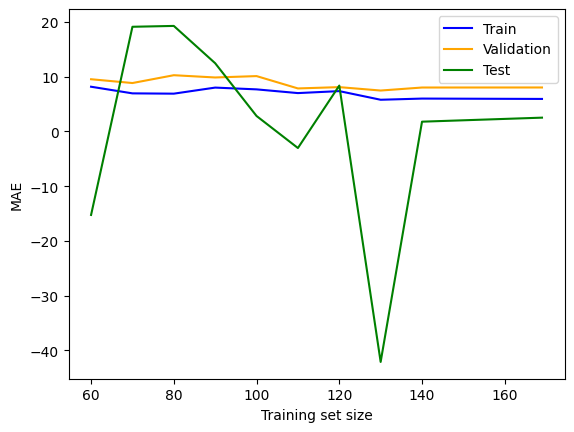

In [18]:
fig = plt.figure()
plt.plot(train_sizes, results_train_mae, color='b', label='Train')
plt.plot(train_sizes, results_val_mae, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mae, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MAE')
plt.savefig('error_plots/Learning_Curve_NN_mae.png')
plt.show()
fig.clear()

### Lets work with MAE models and try to reduce the complexity. The learning curves are a bit weird to understand at this point. I suspect that because the validation errors are higher (in both mae and mse), I coud reduce the complexity of the model and see how it performs.

In [20]:
results_train_mae, results_val_mae, results_test_mae = run_learning_curve(X,y,generate_net_less_complex, metric='mae')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step



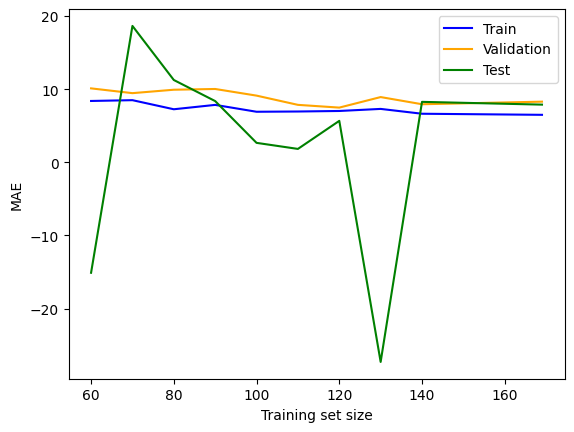

In [21]:
fig = plt.figure()
plt.plot(train_sizes, results_train_mae, color='b', label='Train')
plt.plot(train_sizes, results_val_mae, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mae, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MAE')
plt.savefig('error_plots/Learning_Curve_NN_mae_less_complex_net.png')
plt.show()
fig.clear()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:,:], test_size=0.2, random_state=22)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 16) (135, 6)
(34, 16) (34, 6)


In [26]:
model = generate_net_less_complex(X_train,y_train)
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=8, 
                    verbose=1)
model.save('models/NN_mae.keras')

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 26.2871 - mae: 26.2871 - val_loss: 26.2895 - val_mae: 26.2895
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.4607 - mae: 26.4607 - val_loss: 26.2383 - val_mae: 26.2383
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.5697 - mae: 26.5697 - val_loss: 26.2089 - val_mae: 26.2089
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.6195 - mae: 26.6195 - val_loss: 26.1875 - val_mae: 26.1875
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.4905 - mae: 26.4905 - val_loss: 26.1689 - val_mae: 26.1689
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.8288 - mae: 26.8288 - val_loss: 26.1523 - val_mae: 26.1523
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.8696 - mae: 25.8696 - val_loss: 26.1344 - val_mae: 26.1344
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.1455 - mae: 26.1455 - val_loss: 26.1087 - val_mae: 26.1087
Epoch 9/200
14/14 ━━━━━━━━━━━━━

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8657 - mae: 6.8657 - val_loss: 8.7697 - val_mae: 8.7697
Epoch 55/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5750 - mae: 7.5750 - val_loss: 8.7227 - val_mae: 8.7227
Epoch 56/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8039 - mae: 7.8039 - val_loss: 8.7116 - val_mae: 8.7116
Epoch 57/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4908 - mae: 7.4908 - val_loss: 8.6675 - val_mae: 8.6675
Epoch 58/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1002 - mae: 7.1002 - val_loss: 8.6384 - val_mae: 8.6384
Epoch 59/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2786 - mae: 8.2786 - val_loss: 8.6554 - val_mae: 8.6554
Epoch 60/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5693 - mae: 7.5693 - val_loss: 8.6042 - val_mae: 8.6042
Epoch 61/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0724 - mae: 7.0724 - val_loss: 8.5951 - val_mae: 8.5951
Epoch 62/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1619 - 

Epoch 108/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9352 - mae: 6.9352 - val_loss: 7.8523 - val_mae: 7.8523
Epoch 109/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5057 - mae: 6.5057 - val_loss: 7.8058 - val_mae: 7.8058
Epoch 110/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4473 - mae: 6.4473 - val_loss: 7.8214 - val_mae: 7.8214
Epoch 111/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1442 - mae: 6.1442 - val_loss: 7.8309 - val_mae: 7.8309
Epoch 112/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.1764 - mae: 7.1764 - val_loss: 7.7670 - val_mae: 7.7670
Epoch 113/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2471 - mae: 6.2471 - val_loss: 7.8046 - val_mae: 7.8046
Epoch 114/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8939 - mae: 5.8939 - val_loss: 7.7871 - val_mae: 7.7871
Epoch 115/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6353 - mae: 6.6353 - val_loss: 7.7772 - val_mae: 7.7772
Epoch 116/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 

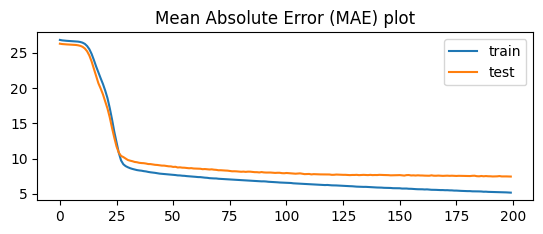

In [27]:
fig = plt.figure()
plt.subplot(212)
plt.title('Mean Absolute Error (MAE) plot')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
fig.clear()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
<class 'numpy.ndarray'>
CO(conv) 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


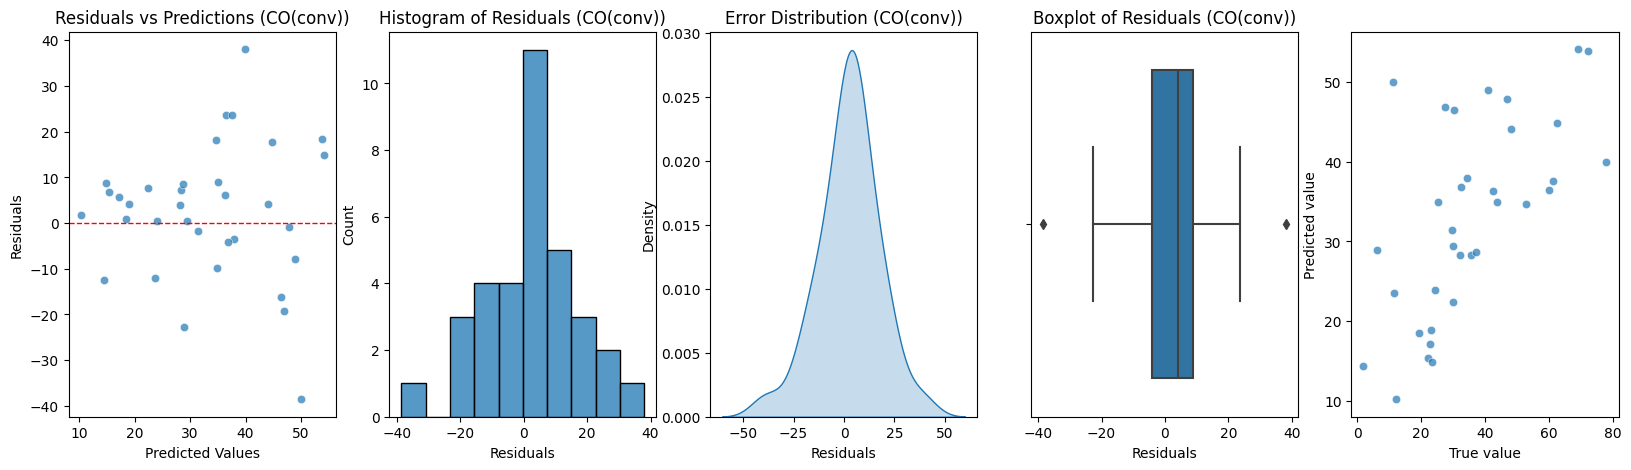

CH4 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


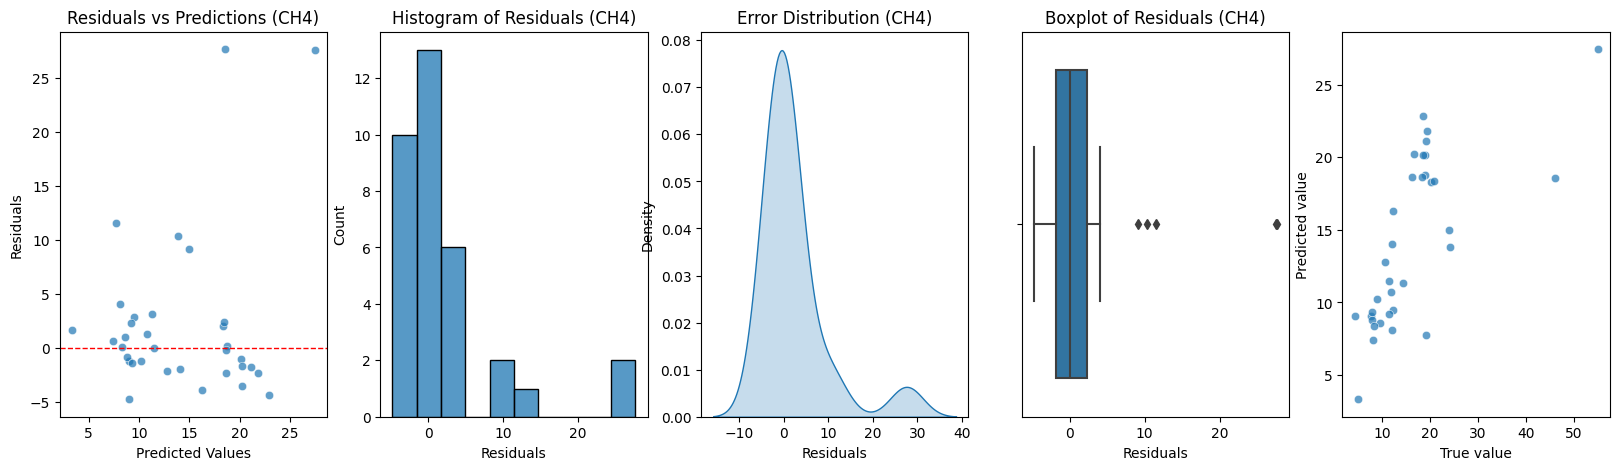

CO2 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


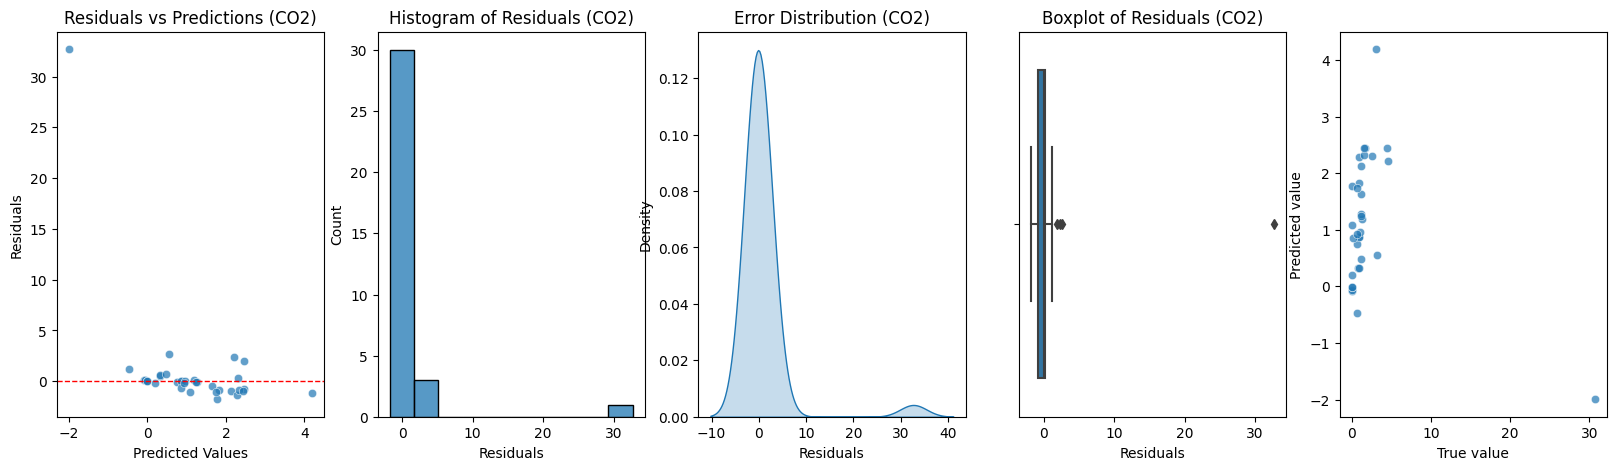

C2-C4 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


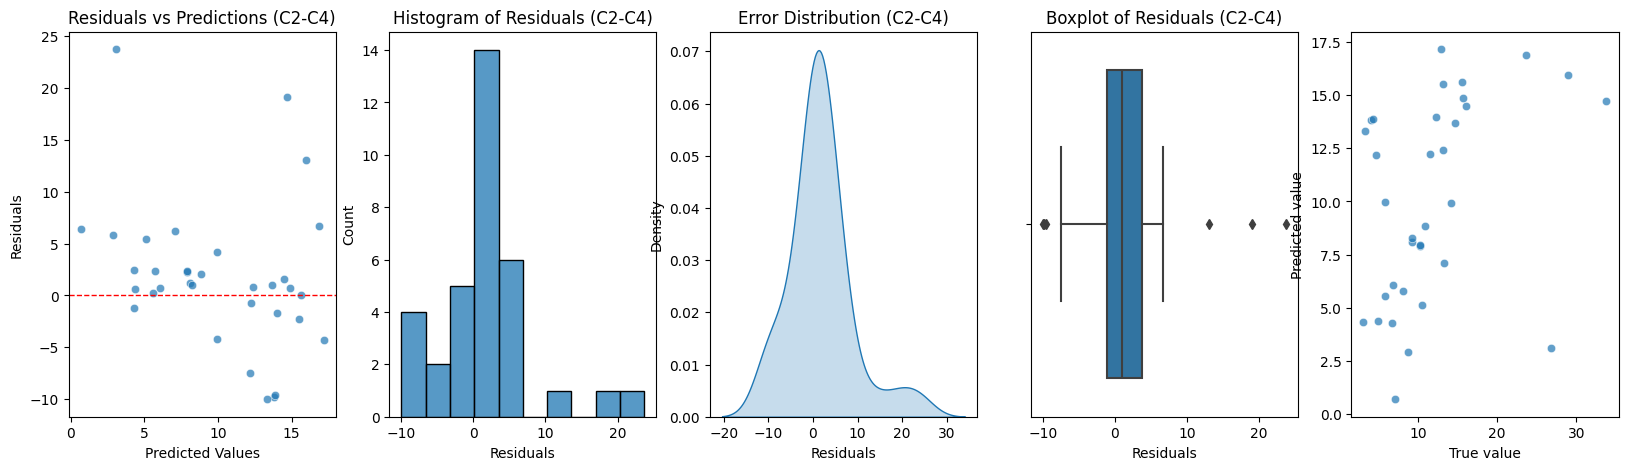

С5+ 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


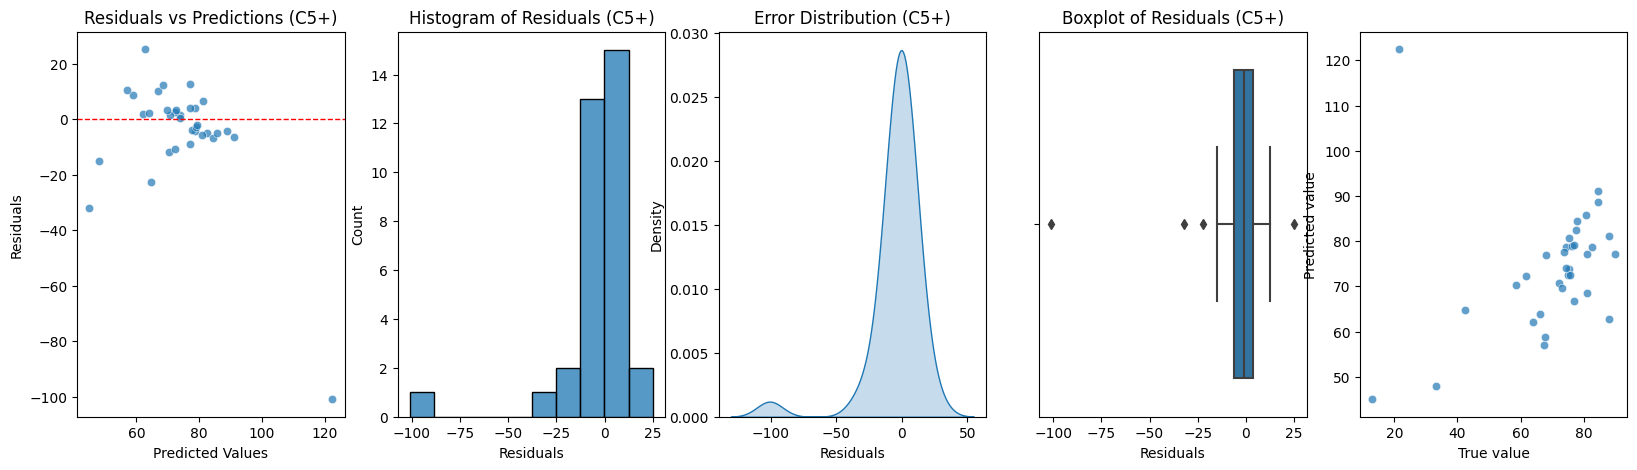

Mult 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


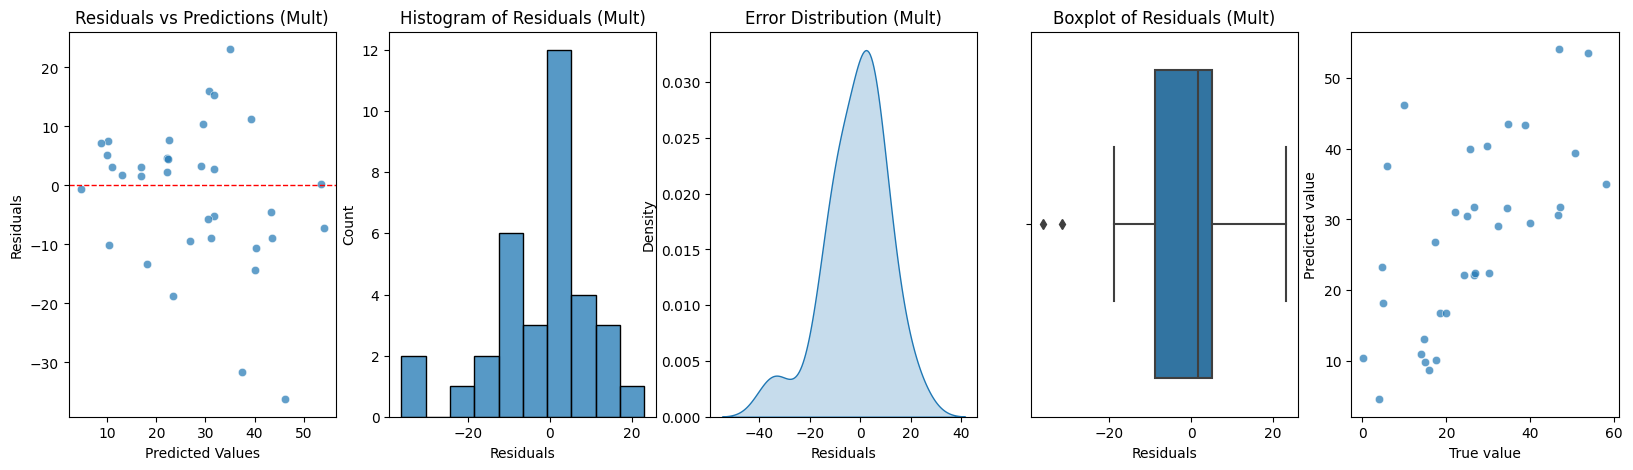

In [28]:
y_pred_all = model.predict(X_test_scaled)
residual_all = np.array(y_test)-y_pred_all
print(type(residual_all))
for i, col in enumerate(catalyst_properties.columns):
    print(col,'\n')
    y_pred = y_pred_all[:,i]
    residual = residual_all[:,i]
    fig, ax = plt.subplots(1,5,figsize=(20,5))
    sns.scatterplot(x=np.array(y_test)[:,i], y=y_pred, alpha=0.7, ax=ax[4])
    sns.scatterplot(x=y_pred, y=residual, alpha=0.7, ax=ax[0])
    sns.histplot(residual, bins=10, ax=ax[1])
    sns.kdeplot(residual, fill=True, ax=ax[2])
    sns.boxplot(x=residual, ax=ax[3])
    ax[0].axhline(0, color='red', linestyle='--', linewidth=1)
    ax[0].set_title(f"Residuals vs Predictions ({col})")
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("Residuals")
    ax[1].set_title(f"Histogram of Residuals ({col})")
    ax[2].set_title(f"Error Distribution ({col})")
    ax[3].set_title(f"Boxplot of Residuals ({col})")
    ax[1].set_xlabel("Residuals")
    ax[2].set_xlabel("Residuals")
    ax[3].set_xlabel("Residuals")
    ax[4].set_xlabel("True value")
    ax[4].set_ylabel("Predicted value")
#     plt.savefig(f'Performance of XGB on test set for {col}.png')
    plt.show()
    fig.clear()

### Let's use some of the following techniques to reduce the number of features in the data set (dimensionality reduction). This is based on the knowledge obtain from the following website --> https://en.wikipedia.org/wiki/Dimensionality_reduction, https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
from sklearn.decomposition import PCA

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:], y[:,:], test_size=0.2, random_state=22)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 3) (135, 6)
(34, 3) (34, 6)


In [26]:
model = generate_net_less_complex(X_train,y_train)
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=8, 
                    verbose=0)
model.save('models/NN_mae_pca_3_components.keras')

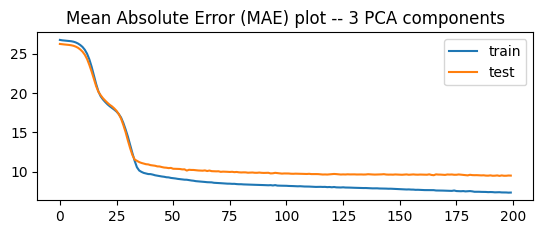

In [27]:
fig = plt.figure()
plt.subplot(212)
plt.title('Mean Absolute Error (MAE) plot -- 3 PCA components')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
fig.clear()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EC3DD564D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
<class 'numpy.ndarray'>
CO(conv) 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


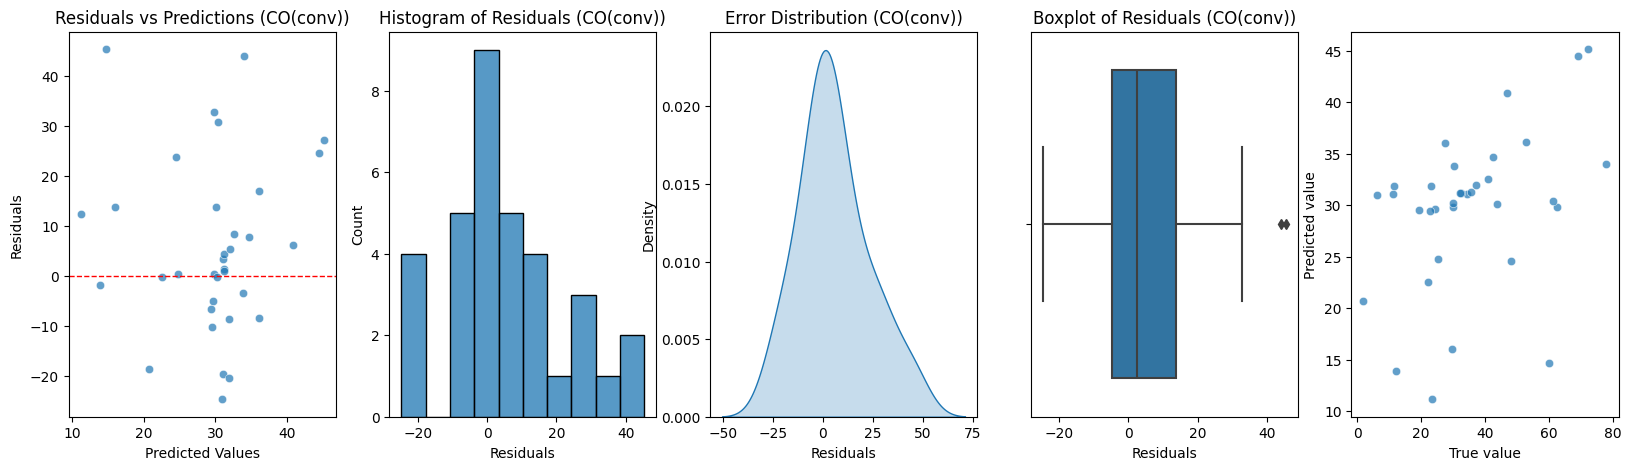

CH4 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


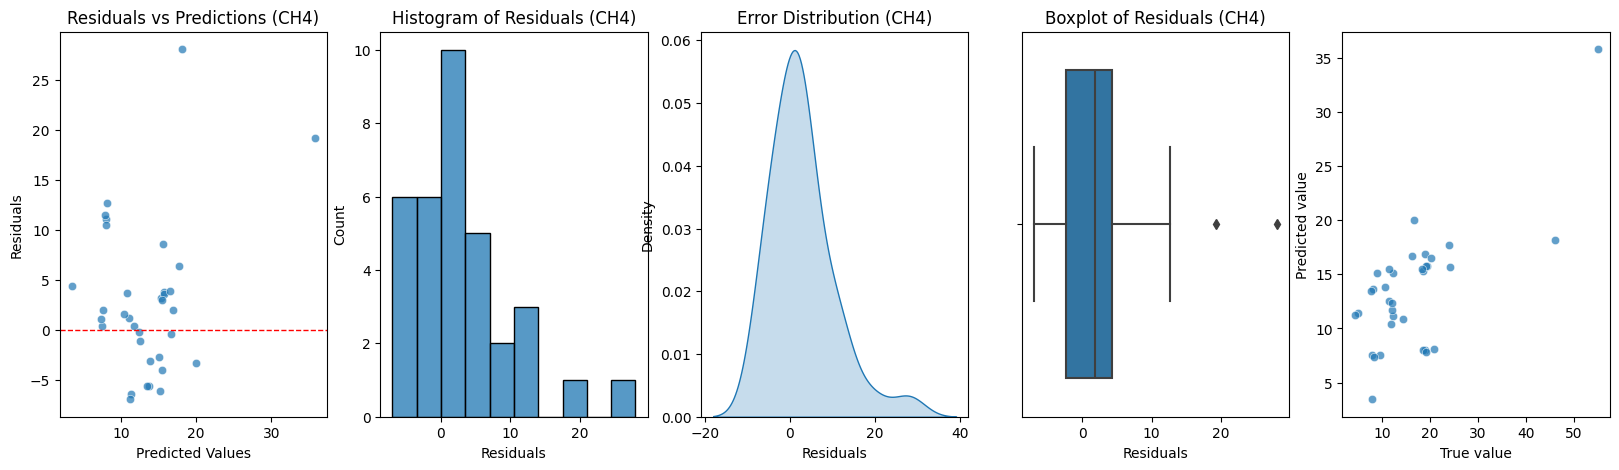

CO2 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


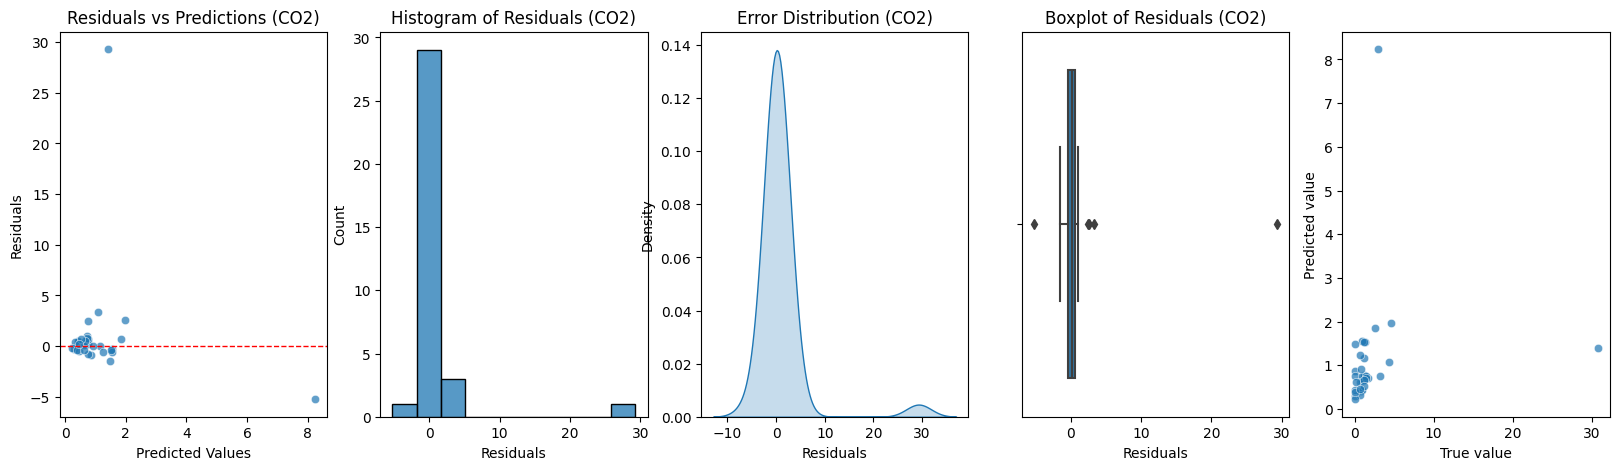

C2-C4 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


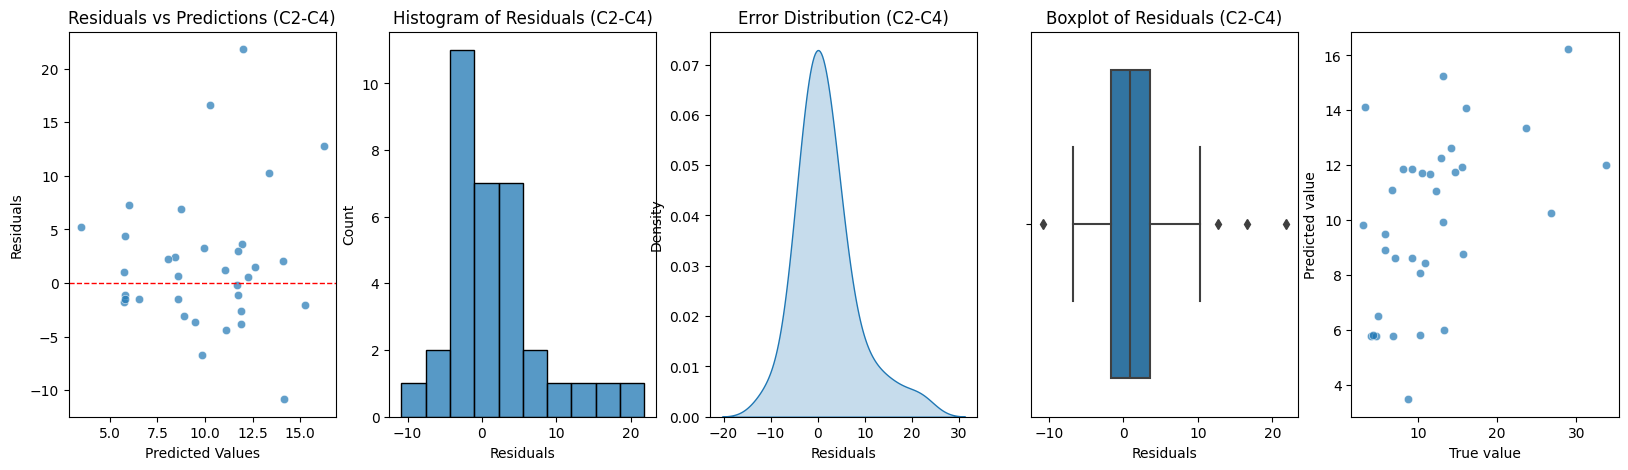

С5+ 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


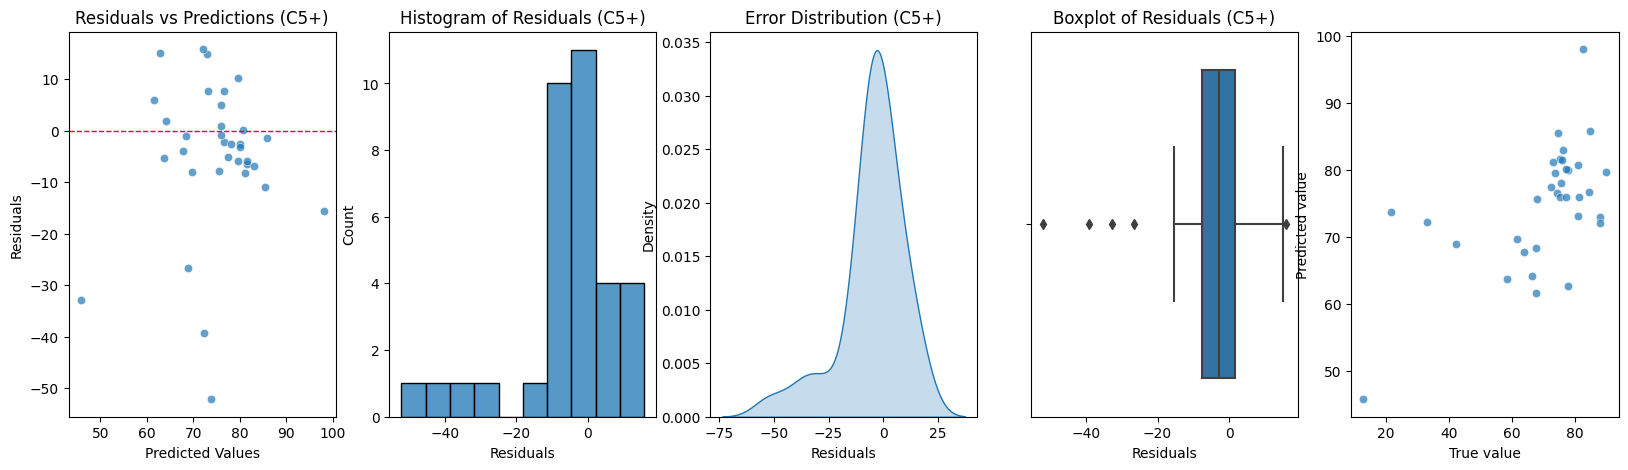

Mult 



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


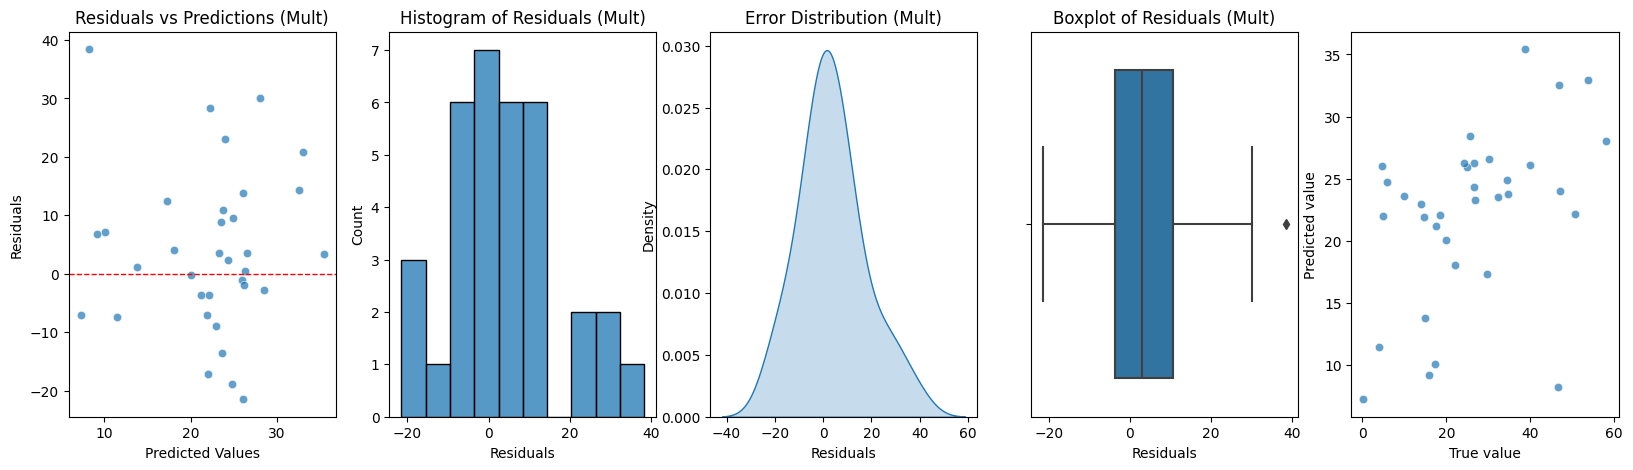

In [28]:
y_pred_all = model.predict(X_test)
residual_all = np.array(y_test)-y_pred_all
print(type(residual_all))
for i, col in enumerate(catalyst_properties.columns):
    print(col,'\n')
    y_pred = y_pred_all[:,i]
    residual = residual_all[:,i]
    fig, ax = plt.subplots(1,5,figsize=(20,5))
    sns.scatterplot(x=np.array(y_test)[:,i], y=y_pred, alpha=0.7, ax=ax[4])
    sns.scatterplot(x=y_pred, y=residual, alpha=0.7, ax=ax[0])
    sns.histplot(residual, bins=10, ax=ax[1])
    sns.kdeplot(residual, fill=True, ax=ax[2])
    sns.boxplot(x=residual, ax=ax[3])
    ax[0].axhline(0, color='red', linestyle='--', linewidth=1)
    ax[0].set_title(f"Residuals vs Predictions ({col})")
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("Residuals")
    ax[1].set_title(f"Histogram of Residuals ({col})")
    ax[2].set_title(f"Error Distribution ({col})")
    ax[3].set_title(f"Boxplot of Residuals ({col})")
    ax[1].set_xlabel("Residuals")
    ax[2].set_xlabel("Residuals")
    ax[3].set_xlabel("Residuals")
    ax[4].set_xlabel("True value")
    ax[4].set_ylabel("Predicted value")
#     plt.savefig(f'Performance of XGB on test set for {col}.png')
    plt.show()
    fig.clear()